Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [43]:
diabetes_data = pd.read_csv('/Users/purnendubikashjana/Documents/diabetes.csv')
diabetes_data.shape

(768, 9)

EDA

In [44]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Count of Nans

In [45]:
diabetes_data_copy = diabetes_data.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


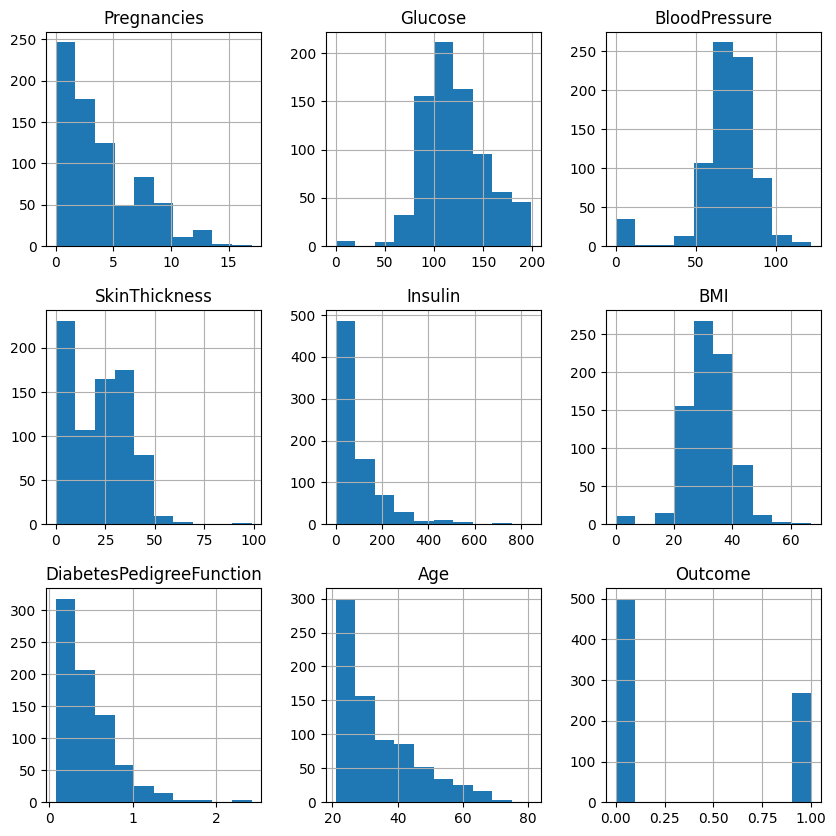

In [46]:
p = diabetes_data.hist(figsize = (10,10))

To Impute Nan Values

In [47]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

Plotting After Nan Removal

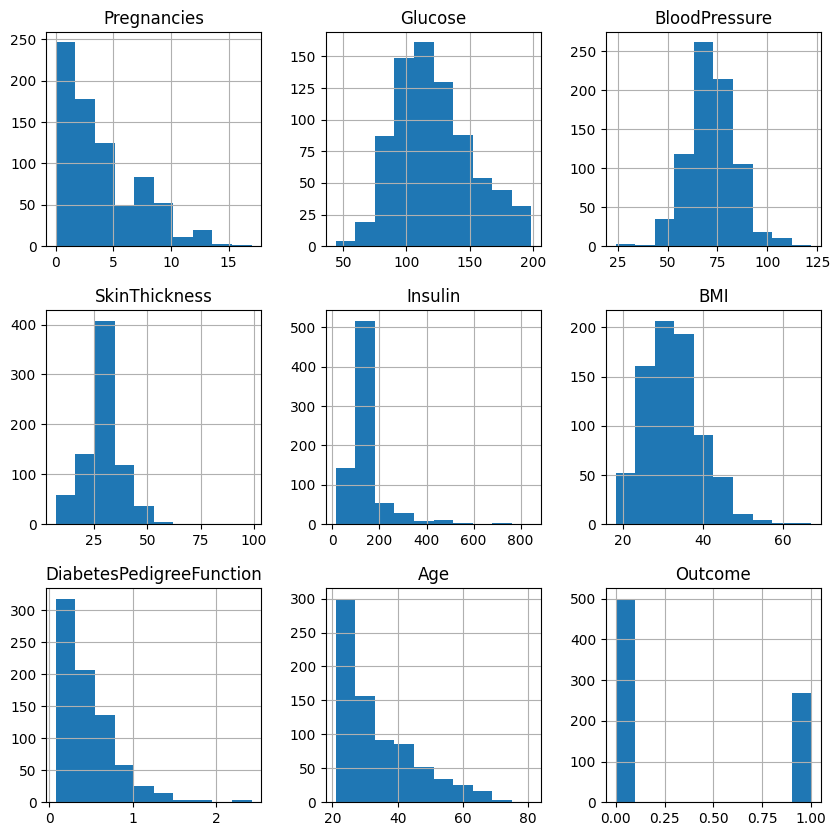

In [48]:
p = diabetes_data_copy.hist(figsize = (10,10))

Scatter Matrix of Uncleaned Data

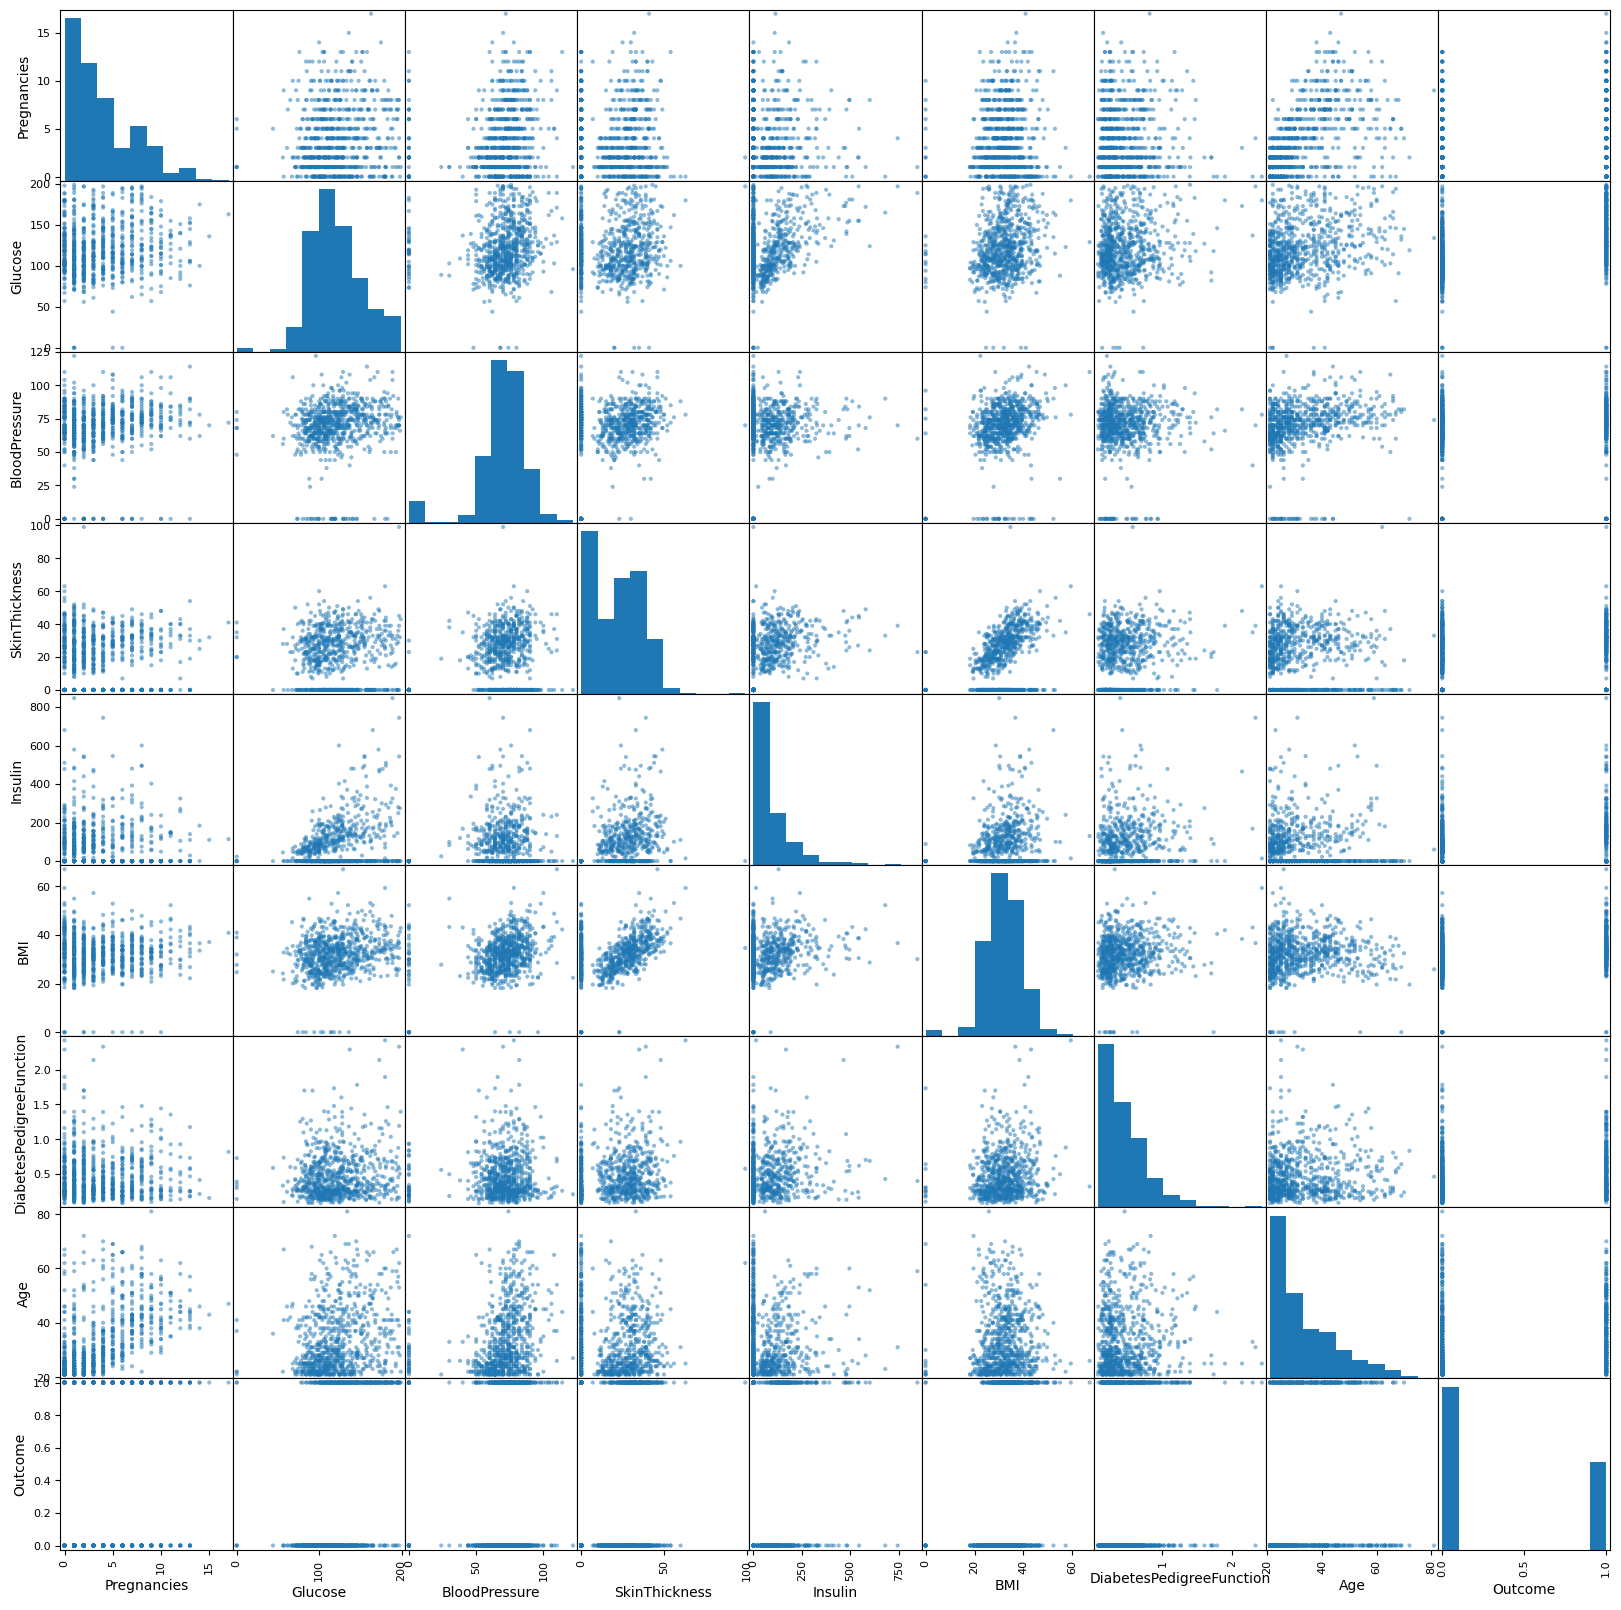

In [49]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(diabetes_data,figsize=(20, 20))

Pair Plot On Clean Data

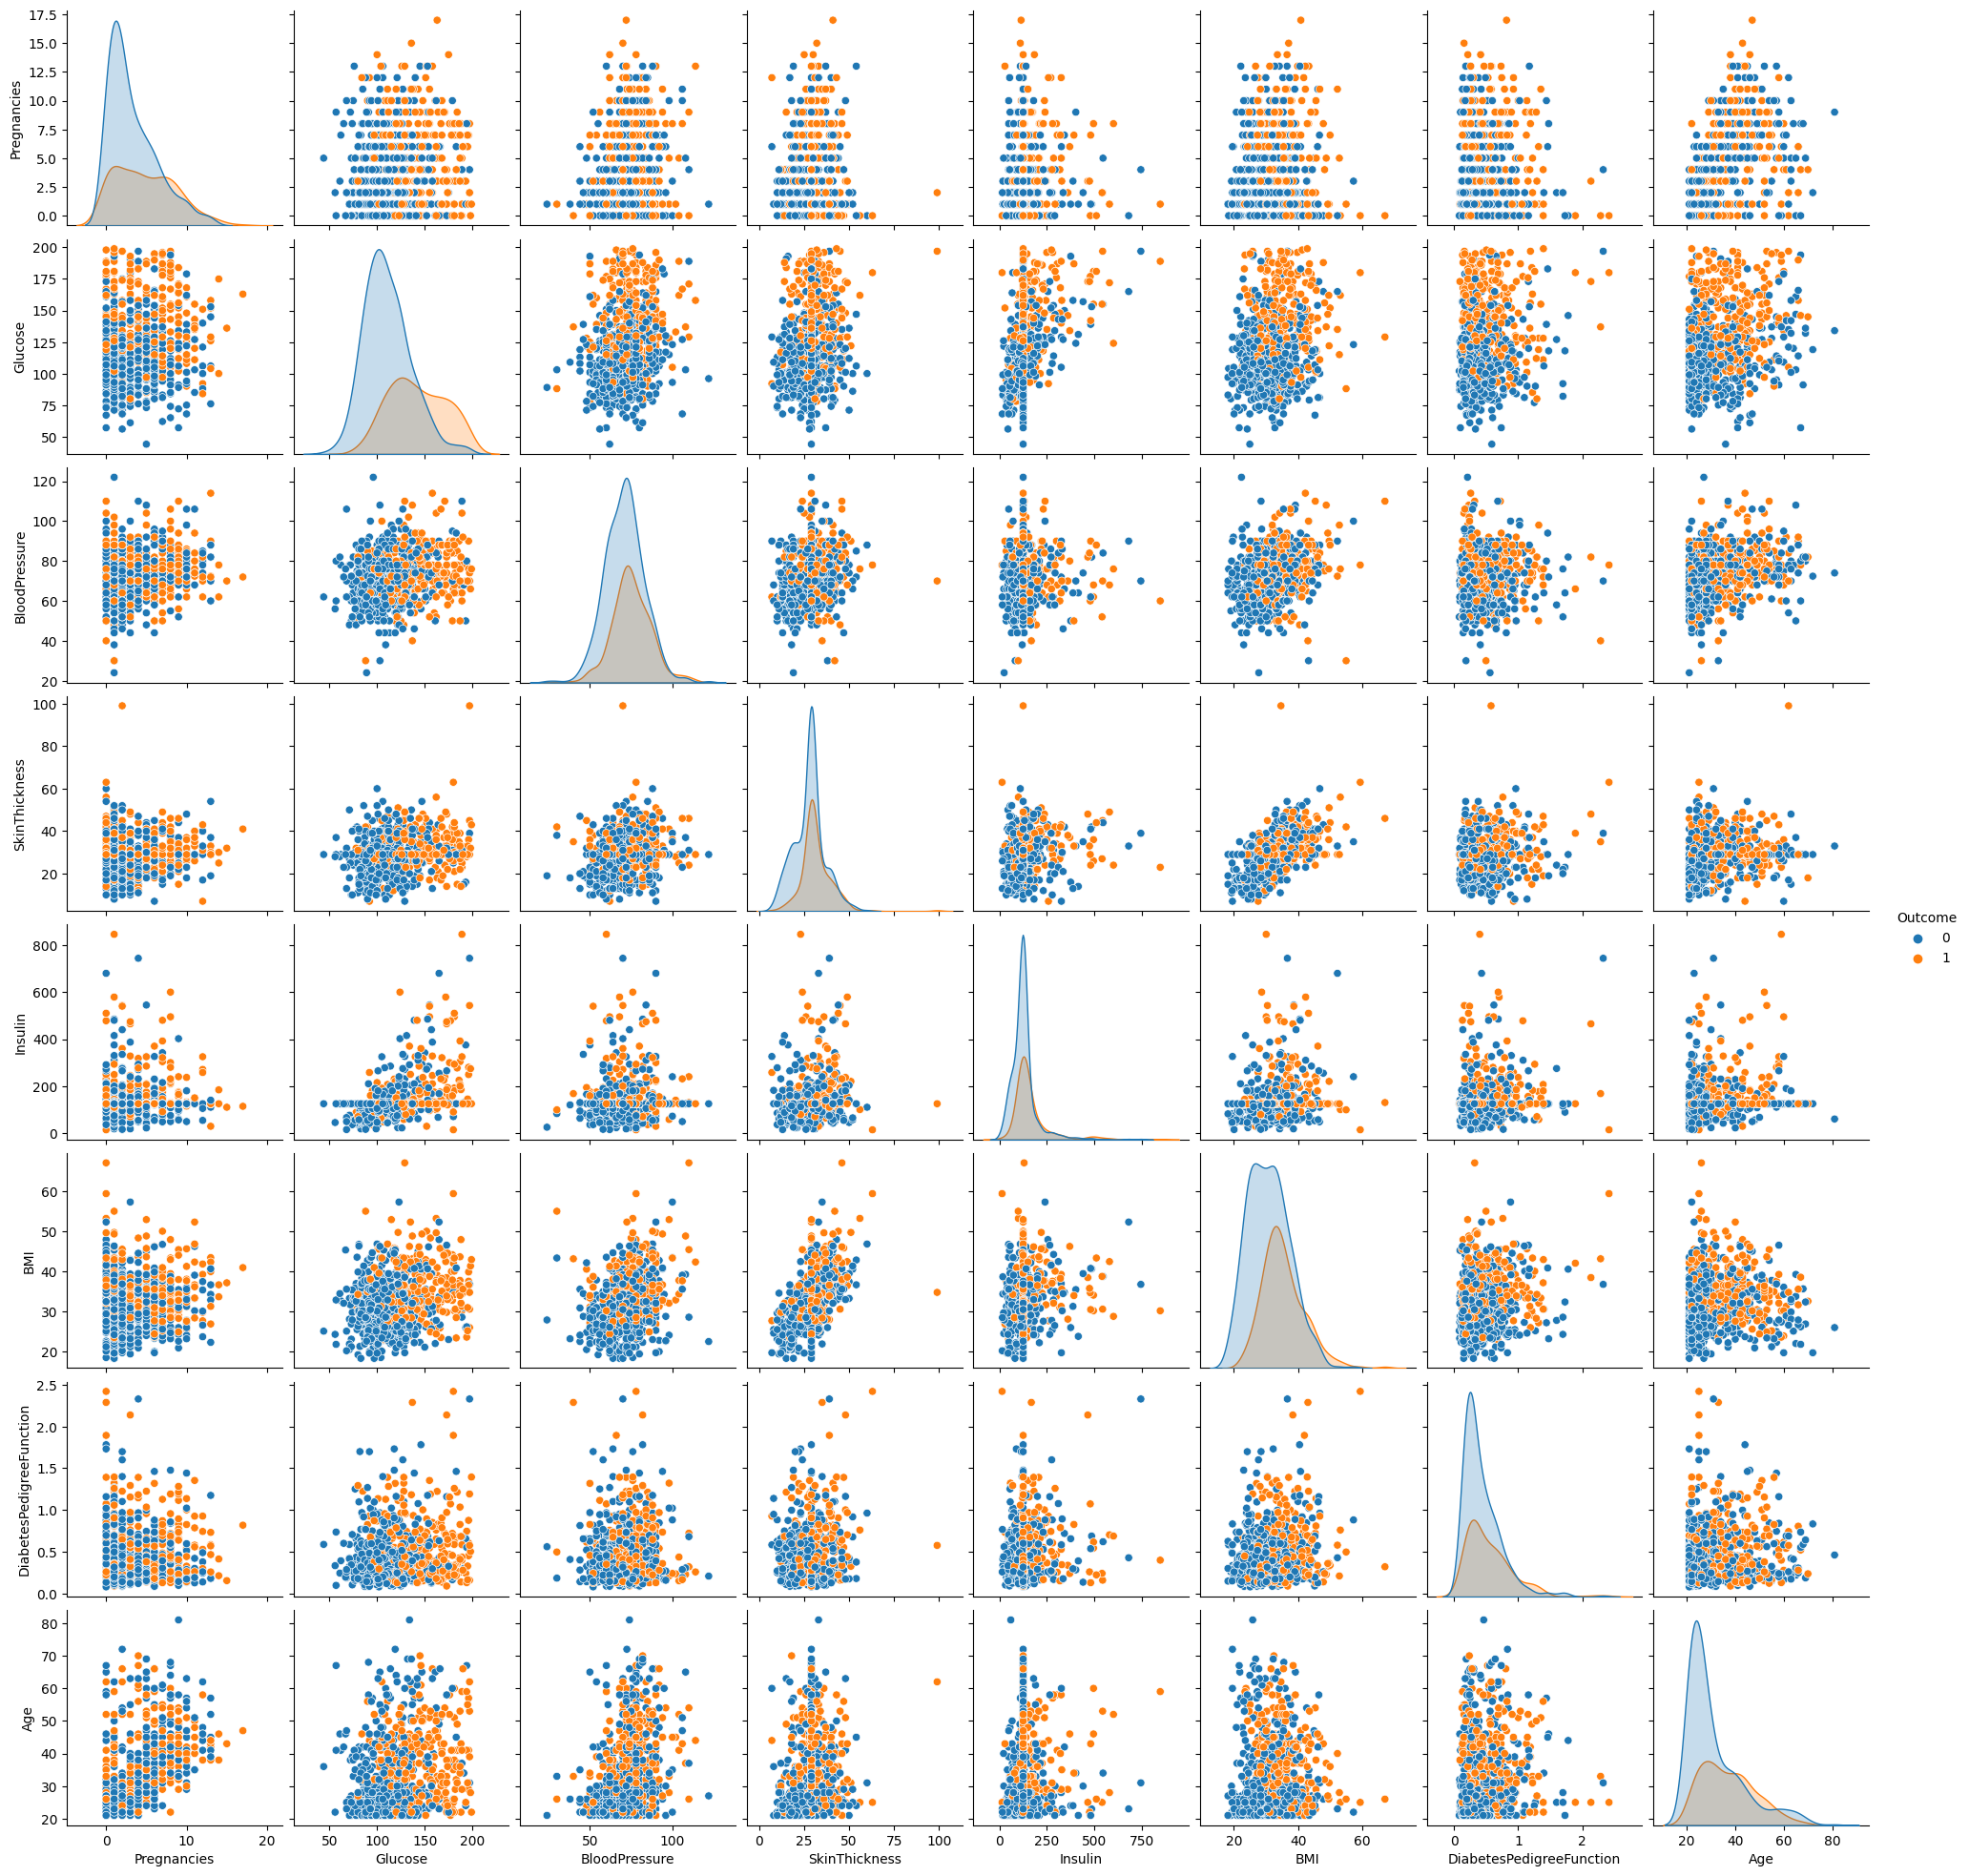

In [50]:
p=sns.pairplot(diabetes_data_copy, hue = 'Outcome')

Scaling The Data

In [53]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [56]:
y = diabetes_data_copy.Outcome

Importing train_test_split

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

Importing KNeighborsClassifier and Implementing

In [58]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [62]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Maximum Train Score : {} %  and  k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Maximum Train Score : 100.0 %  and  k = [1]


In [63]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Maximum Test Score : {} %  and  k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Maximum Test Score : 76.5625 %  and  k = [11]


Setup a KNN Classifier With K Neighbors

In [64]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,25,167
1,35,54,89
All,177,79,256


Text(0.5, 25.722222222222214, 'Predicted label')

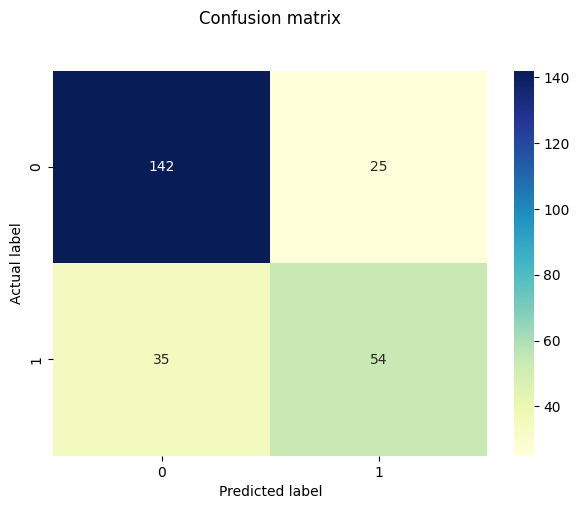

In [40]:
y_pred = knn.predict(X_test)
from sklearn import metrics
plt.figure(figsize=(7,5))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Hyper Parameter Optimization

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
